In [1]:
from pycbc import distributions
from pycbc.waveform import get_td_waveform
import matplotlib.pyplot as plt
import numpy as np
import pylab
from tqdm.notebook import tqdm
from gwpy.timeseries import TimeSeries
import pandas as pd
import os
import csv
import pycbc.noise
import pycbc.psd
import pycbc.filter

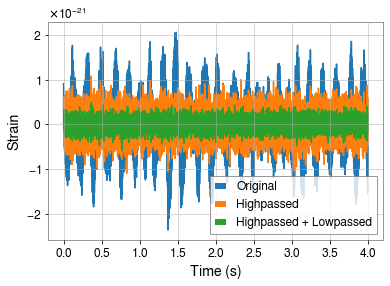

In [16]:
# Generate some noise with an advanced ligo psd
flow = 5.0
delta_f = 1.0 / 16
flen = int(2048 / delta_f) + 1
psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)

# Generate 1 seconds of noise at 4096 Hz
delta_t = 1.0 / 4096
tsamples = int(4 / delta_t) ############################################# changed this from int(1 / delta_t) to generate 4 seconds of noise 
ts = pycbc.noise.noise_from_psd(tsamples, delta_t, psd, seed=127)
plt.plot(ts.sample_times, ts, label='Original')

# Suppress the low frequencies below 30 Hz
ts = pycbc.filter.highpass(ts, 30.0)
plt.plot(ts.sample_times, ts, label='Highpassed')

# Suppress the high frequencies
ts = pycbc.filter.lowpass_fir(ts, 1000.0, 8)
plt.plot(ts.sample_times, ts, label='Highpassed + Lowpassed')

plt.legend()
plt.ylabel('Strain')
plt.xlabel('Time (s)')
plt.show()

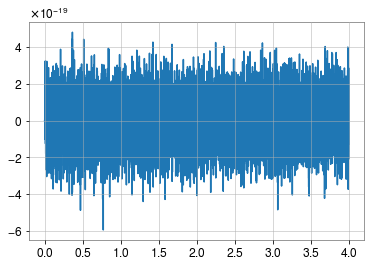

In [17]:
ts *= 1e3
ts.plot() 

In [18]:

print("Generated Binary Mass Distributions for BBH")

bbh_two_mass_distributions = distributions.Uniform(mass1=(10, 50),
                                               mass2=(10, 50))

bbh_two_mass_samples = bbh_two_mass_distributions.rvs(size=1)

Generated Binary Mass Distributions for BBH


Using Binary Mass Distributions to generate BBH waveforms
Generating BBH Waveforms, Noise and Merging them together and writing into disk, it may take few minutes...


  0%|          | 0/1 [00:00<?, ?it/s]

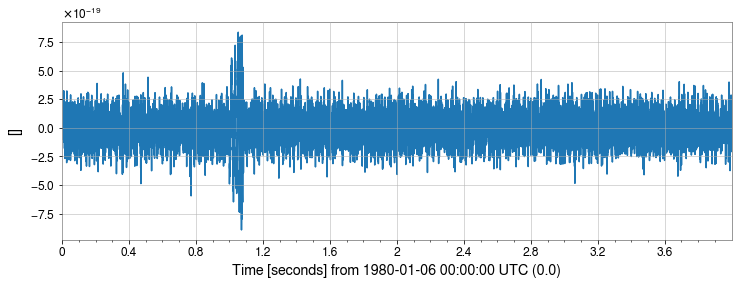

In [20]:
print("Using Binary Mass Distributions to generate BBH waveforms")
print("Generating BBH Waveforms, Noise and Merging them together and writing into disk, it may take few minutes...")

for i in tqdm(range(len(bbh_two_mass_samples))):

    hp, hc = get_td_waveform(approximant="SEOBNRv2",                                # what are hp and hc?
                         mass1=bbh_two_mass_samples[i][0],
                         mass2=bbh_two_mass_samples[i][1],
                         delta_t=1.0/4096,
                         f_lower=40)                                                # change to 40 Hz

    st = 1

    signal = TimeSeries.from_pycbc(hp)
    noise = TimeSeries.from_pycbc(ts)
    signal.write("data/bbh_signal.txt")
    noise.write("data/noise/noise.txt")
    
    signal.t0 = st
    data = noise.inject(signal)
    
    data.write("data/merged/bbh_merged_noise_signal.txt")
    data.plot()

In [21]:
# MERGING NOISE + SIgnal Templates into single file


#for i in tqdm(range(5)):
path = "data/merged/"
files= os.listdir(path)
f = open('data/Final_BBH_Merged_Noise_Signal.csv', 'w')
cw = csv.writer(f)

for i in tqdm(files):
    df = pd.read_csv(path+i,sep = ' ', header=None)
    c = df[:][1]
    cw.writerow(c)
f.close()

  0%|          | 0/1 [00:00<?, ?it/s]

In [22]:
# MERGING NOISE Templates into single file

path_1 = "data/noise/"
files_1= os.listdir(path_1)
f1 = open('data/Final_Merged_Noise_Reduced_No_Abs.csv', 'w')
cw_1 = csv.writer(f1)

for i in tqdm(files_1):
    #print(files)
    df = pd.read_csv(path_1+i,sep = ' ', header=None)
    c = df[:][1]
    cw_1.writerow(c)
f1.close()

  0%|          | 0/1 [00:00<?, ?it/s]